In [1]:
import numpy as np
import pandas as pd

In [145]:
df = pd.read_csv(r'C:\cloudxlab\freelance\Banktransaction_data_5.csv')

In [161]:
# Printing mode and median values for missing column values
print(df.CustGender.mode())
print(df.CustLocation.mode())
print(df.CustAccountBalance.median())

0    M
dtype: object
0    MUMBAI
dtype: object
17003.84


In [147]:
#converting customer dob into identical format
df['CustomerDOBS'] = pd.to_datetime(df['CustomerDOB'])
df['year'], df['month'] ,df['day']= df['CustomerDOBS'].dt.year, df['CustomerDOBS'].dt.month,df['CustomerDOBS'].dt.day

In [162]:
# Printing mode and median values for missing column values
print(df.month.mode())
print(df.year.mode())
print(df.day.mode().values[0])

0    1
dtype: int64
0    1990
dtype: int64
15


In [149]:
#insert day,month and year for nan or empty values 
df.day.fillna(df.day.mode().values[0],inplace=True)
df.month.fillna(df.month.mode().values[0],inplace=True)
df.year.fillna(df.year.mode().values[0],inplace=True)

In [150]:
#converting year,month and day to integar
cols = ['year', 'month','day']
df[cols] = df[cols].applymap(np.int64)

In [151]:
#joining year,month and day to create respective date
cols=["year","month","day"]
df['date_sudeep_final'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [152]:
#extract age from Customer DOB
import datetime
ages = []
months = [int(i.split("-")[-2]) for i in df.date_sudeep_final.values]
years = [int(i.split("-")[-3]) for i in df.date_sudeep_final.values]
for i in years:
    if(len(str(i))) == 4:
        ages.append(2022 - i)
    else:
        ages.append(2022 - (1900 + i))

In [153]:
months,years

([10,
  4,
  11,
  9,
  3,
  8,
  1,
  1,
  4,
  6,
  7,
  7,
  6,
  5,
  3,
  10,
  1,
  7,
  11,
  6,
  4,
  8,
  1,
  1,
  5,
  2,
  1,
  1,
  1,
  12,
  1,
  6,
  2,
  7,
  4,
  1,
  10,
  12,
  3,
  6,
  4,
  6,
  6,
  7,
  10,
  2,
  10,
  12,
  4,
  1,
  6,
  7,
  2,
  11,
  10,
  2,
  7,
  8,
  7,
  6,
  7,
  11,
  10,
  1,
  4,
  7,
  7,
  1,
  2,
  3,
  10,
  3,
  10,
  2,
  8,
  8,
  2,
  6,
  10,
  5,
  4,
  5,
  2,
  8,
  1,
  1,
  8,
  3,
  11,
  9,
  3,
  3,
  9,
  4,
  5,
  5,
  10,
  7,
  10,
  9,
  4,
  10,
  1,
  11,
  4,
  8,
  1,
  6,
  10,
  6,
  4,
  7,
  10,
  6,
  3,
  4,
  5,
  12,
  12,
  1,
  7,
  3,
  9,
  1,
  4,
  1,
  10,
  3,
  2,
  12,
  2,
  7,
  3,
  4,
  4,
  1,
  10,
  3,
  3,
  12,
  11,
  2,
  10,
  6,
  1,
  8,
  6,
  9,
  5,
  9,
  3,
  1,
  1,
  6,
  9,
  11,
  4,
  6,
  9,
  2,
  12,
  6,
  1,
  1,
  11,
  2,
  3,
  7,
  8,
  6,
  4,
  9,
  1,
  4,
  5,
  5,
  1,
  9,
  8,
  1,
  8,
  1,
  1,
  9,
  11,
  6,
  10,
  4,
  11,
  4,
  1,
  4,
  

In [154]:
#Create new column customer age
df['CustomerAge'] = ages

In [155]:
#inserting custgender,location and accountbalance for nan or empty values
df.CustGender.fillna(df.CustGender.mode().values[0],inplace=True)
df.CustLocation.fillna(df.CustLocation.mode().values[0],inplace=True)
df.CustAccountBalance.fillna(df.CustAccountBalance.median(),inplace=True)

In [156]:
#extract year,month and day from transaction date
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['yeart'], df['montht'] ,df['dayt']= df['TransactionDate'].dt.year, df['TransactionDate'].dt.month,df['TransactionDate'].dt.day
cols = ['yeart', 'montht','dayt']
df[cols] = df[cols].applymap(np.int64)
colst=["yeart","montht","dayt"]
df['transaction_date_sudeep'] = df[colst].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [157]:
#converting transactionid into numeric by len function
df['len_TransactionID'] = df['TransactionID'].apply(len)

In [158]:
#converting customerid into numeric by len function

df['len_CustomerID'] = df['CustomerID'].apply(len)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666550 entries, 0 to 666549
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            666550 non-null  object        
 1   CustomerID               666550 non-null  object        
 2   CustomerDOB              627108 non-null  object        
 3   CustGender               666550 non-null  object        
 4   CustLocation             666550 non-null  object        
 5   CustAccountBalance       666550 non-null  float64       
 6   TransactionDate          666550 non-null  datetime64[ns]
 7   TransactionAmount (INR)  666550 non-null  float64       
 8   DQ Issue                 666550 non-null  object        
 9   CustomerDOBS             627108 non-null  datetime64[ns]
 10  year                     666550 non-null  int64         
 11  month                    666550 non-null  int64         
 12  day             

In [160]:
df


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),DQ Issue,CustomerDOBS,...,month,day,date_sudeep_final,CustomerAge,yeart,montht,dayt,transaction_date_sudeep,len_TransactionID,len_CustomerID
0,T20208001,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-02-08,25.00,N,1994-10-01,...,10,1,1994-10-1,28,2016,2,8,2016-2-8,9,8
1,T20208002,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-02-08,27999.00,N,1957-04-04,...,4,4,1957-4-4,65,2016,2,8,2016-2-8,9,8
2,T20208003,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-02-08,459.00,N,1996-11-26,...,11,26,1996-11-26,26,2016,2,8,2016-2-8,9,8
3,T20208004,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-02-08,2060.00,N,1973-09-14,...,9,14,1973-9-14,49,2016,2,8,2016-2-8,9,8
4,T20208005,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-02-08,1762.50,N,1988-03-24,...,3,24,1988-3-24,34,2016,2,8,2016-2-8,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666545,T20874546,C6532244,09-09-1982,F,MUMBAI,5315.45,2016-08-31,16.00,N,1982-09-09,...,9,9,1982-9-9,40,2016,8,31,2016-8-31,9,8
666546,T20874547,C2425686,22-02-1990,M,NEW DELHI,143945.30,2016-08-31,2659.14,N,1990-02-22,...,2,22,1990-2-22,32,2016,8,31,2016-8-31,9,8
666547,T20874548,C5029245,12-01-1977,M,RAJKOT,12921.53,2016-08-31,524.00,N,1977-12-01,...,12,1,1977-12-1,45,2016,8,31,2016-8-31,9,8
666548,T20874549,C8338828,26-01-1981,F,SOLAN,4762.88,2016-08-31,100.00,N,1981-01-26,...,1,26,1981-1-26,41,2016,8,31,2016-8-31,9,8


In [ ]:
#create dataframe by extract all required columns
df_main_s = df[['len_TransactionID','len_CustomerID','CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge','dayt','montht','yeart','DQ Issue']]

In [ ]:
#save newly created df into csv
df_main_s.to_csv(r'C:\cloudxlab\freelance\sudeep.csv')

In [1]:
#loading csv file
import pandas as pd
import numpy as np
df_sudeep = pd.read_csv(r'C:\cloudxlab\freelance\sudeep.csv')

In [2]:
print('Quality not isses: ', round(df_sudeep['DQ Issue'].value_counts()[0]/len(df_sudeep) * 100,2), '% of the dataset')

print('Quality issues: ', round(df_sudeep['DQ Issue'].value_counts()[1]/len(df_sudeep) * 100,2), '% of the dataset')

Quality not isses:  94.03 % of the dataset
Quality issues:  5.97 % of the dataset


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler_amount = StandardScaler()

In [6]:
df_sudeep

,len_TransactionID,len_CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,dayt,montht,yeart,DQ Issue
0,9,8,F,JAMSHEDPUR,17819.05,25.00,28,8,2,2016,N
1,9,8,M,JHAJJAR,2270.69,27999.00,65,8,2,2016,N
2,9,8,F,MUMBAI,17874.44,459.00,26,8,2,2016,N
3,9,8,F,MUMBAI,866503.21,2060.00,49,8,2,2016,N
4,9,8,F,NAVI MUMBAI,6714.43,1762.50,34,8,2,2016,N
...,...,...,...,...,...,...,...,...,...,...,...
666545,9,8,F,MUMBAI,5315.45,16.00,40,31,8,2016,N
666546,9,8,M,NEW DELHI,143945.30,2659.14,32,31,8,2016,N
666547,9,8,M,RAJKOT,12921.53,524.00,45,31,8,2016,N
666548,9,8,F,SOLAN,4762.88,100.00,41,31,8,2016,N


In [7]:
#applying Standard Scaler to all numeric columns values for normalization
df_sudeep['normlen_TransactionID'] = scaler_amount.fit_transform(df_sudeep['len_TransactionID'].values.reshape(-1, 1))
df_sudeep['normlen_CustomerID'] = scaler_amount.fit_transform(df_sudeep['len_CustomerID'].values.reshape(-1, 1))
df_sudeep['normCustAccountBalance'] = scaler_amount.fit_transform(df_sudeep['CustAccountBalance'].values.reshape(-1, 1))
df_sudeep['normTransactionAmount (INR)'] = scaler_amount.fit_transform(df_sudeep['TransactionAmount (INR)'].values.reshape(-1, 1))
df_sudeep['normCustomerAge'] = scaler_amount.fit_transform(df_sudeep['CustomerAge'].values.reshape(-1, 1))
df_sudeep['normdayt'] = scaler_amount.fit_transform(df_sudeep['dayt'].values.reshape(-1, 1))
df_sudeep['normmontht'] = scaler_amount.fit_transform(df_sudeep['montht'].values.reshape(-1, 1))
df_sudeep['normyeart'] = scaler_amount.fit_transform(df_sudeep['yeart'].values.reshape(-1, 1))

In [8]:
df_sudeep

,len_TransactionID,len_CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,dayt,montht,yeart,DQ Issue,normlen_TransactionID,normlen_CustomerID,normCustAccountBalance,normTransactionAmount (INR),normCustomerAge,normdayt,normmontht,normyeart
0,9,8,F,JAMSHEDPUR,17819.05,25.00,28,8,2,2016,N,0.003099,0.012311,-0.128643,-0.231550,-1.017684,-1.023564,-2.321762,0.0
1,9,8,M,JHAJJAR,2270.69,27999.00,65,8,2,2016,N,0.003099,0.012311,-0.149247,3.909165,3.270609,-1.023564,-2.321762,0.0
2,9,8,F,MUMBAI,17874.44,459.00,26,8,2,2016,N,0.003099,0.012311,-0.128570,-0.167309,-1.249484,-1.023564,-2.321762,0.0
3,9,8,F,MUMBAI,866503.21,2060.00,49,8,2,2016,N,0.003099,0.012311,0.995949,0.069671,1.416212,-1.023564,-2.321762,0.0
4,9,8,F,NAVI MUMBAI,6714.43,1762.50,34,8,2,2016,N,0.003099,0.012311,-0.143358,0.025635,-0.322285,-1.023564,-2.321762,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666545,9,8,F,MUMBAI,5315.45,16.00,40,31,8,2016,N,0.003099,0.012311,-0.145212,-0.232882,0.373114,2.046984,0.240029,0.0
666546,9,8,M,NEW DELHI,143945.30,2659.14,32,31,8,2016,N,0.003099,0.012311,0.038487,0.158356,-0.554085,2.046984,0.240029,0.0
666547,9,8,M,RAJKOT,12921.53,524.00,45,31,8,2016,N,0.003099,0.012311,-0.135133,-0.157688,0.952613,2.046984,0.240029,0.0
666548,9,8,F,SOLAN,4762.88,100.00,41,31,8,2016,N,0.003099,0.012311,-0.145944,-0.220449,0.489014,2.046984,0.240029,0.0


In [9]:
df_sudeep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666550 entries, 0 to 666549
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   len_TransactionID            666550 non-null  int64  
 1   len_CustomerID               666550 non-null  int64  
 2   CustGender                   666550 non-null  object 
 3   CustLocation                 666550 non-null  object 
 4   CustAccountBalance           666550 non-null  float64
 5   TransactionAmount (INR)      666550 non-null  float64
 6   CustomerAge                  666550 non-null  int64  
 7   dayt                         666550 non-null  int64  
 8   montht                       666550 non-null  int64  
 9   yeart                        666550 non-null  int64  
 10  DQ Issue                     666550 non-null  object 
 11  normlen_TransactionID        666550 non-null  float64
 12  normlen_CustomerID           666550 non-null  float64
 13 

In [10]:
#converting DQ issue column into 0 and 1
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
df_sudeep['DQ Issue'] = lb.fit_transform(df_sudeep['DQ Issue'])

In [11]:
df_sudeep

,len_TransactionID,len_CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,dayt,montht,yeart,DQ Issue,normlen_TransactionID,normlen_CustomerID,normCustAccountBalance,normTransactionAmount (INR),normCustomerAge,normdayt,normmontht,normyeart
0,9,8,F,JAMSHEDPUR,17819.05,25.00,28,8,2,2016,0,0.003099,0.012311,-0.128643,-0.231550,-1.017684,-1.023564,-2.321762,0.0
1,9,8,M,JHAJJAR,2270.69,27999.00,65,8,2,2016,0,0.003099,0.012311,-0.149247,3.909165,3.270609,-1.023564,-2.321762,0.0
2,9,8,F,MUMBAI,17874.44,459.00,26,8,2,2016,0,0.003099,0.012311,-0.128570,-0.167309,-1.249484,-1.023564,-2.321762,0.0
3,9,8,F,MUMBAI,866503.21,2060.00,49,8,2,2016,0,0.003099,0.012311,0.995949,0.069671,1.416212,-1.023564,-2.321762,0.0
4,9,8,F,NAVI MUMBAI,6714.43,1762.50,34,8,2,2016,0,0.003099,0.012311,-0.143358,0.025635,-0.322285,-1.023564,-2.321762,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666545,9,8,F,MUMBAI,5315.45,16.00,40,31,8,2016,0,0.003099,0.012311,-0.145212,-0.232882,0.373114,2.046984,0.240029,0.0
666546,9,8,M,NEW DELHI,143945.30,2659.14,32,31,8,2016,0,0.003099,0.012311,0.038487,0.158356,-0.554085,2.046984,0.240029,0.0
666547,9,8,M,RAJKOT,12921.53,524.00,45,31,8,2016,0,0.003099,0.012311,-0.135133,-0.157688,0.952613,2.046984,0.240029,0.0
666548,9,8,F,SOLAN,4762.88,100.00,41,31,8,2016,0,0.003099,0.012311,-0.145944,-0.220449,0.489014,2.046984,0.240029,0.0


In [12]:
#created new DF with normalization values and dropped custlocation column
df_main = df_sudeep[['normlen_TransactionID','normlen_CustomerID','normCustAccountBalance','normTransactionAmount (INR)','normCustomerAge','normdayt','normmontht','normyeart','DQ Issue','CustGender']]

In [13]:
df_main

,normlen_TransactionID,normlen_CustomerID,normCustAccountBalance,normTransactionAmount (INR),normCustomerAge,normdayt,normmontht,normyeart,DQ Issue,CustGender
0,0.003099,0.012311,-0.128643,-0.231550,-1.017684,-1.023564,-2.321762,0.0,0,F
1,0.003099,0.012311,-0.149247,3.909165,3.270609,-1.023564,-2.321762,0.0,0,M
2,0.003099,0.012311,-0.128570,-0.167309,-1.249484,-1.023564,-2.321762,0.0,0,F
3,0.003099,0.012311,0.995949,0.069671,1.416212,-1.023564,-2.321762,0.0,0,F
4,0.003099,0.012311,-0.143358,0.025635,-0.322285,-1.023564,-2.321762,0.0,0,F
...,...,...,...,...,...,...,...,...,...,...
666545,0.003099,0.012311,-0.145212,-0.232882,0.373114,2.046984,0.240029,0.0,0,F
666546,0.003099,0.012311,0.038487,0.158356,-0.554085,2.046984,0.240029,0.0,0,M
666547,0.003099,0.012311,-0.135133,-0.157688,0.952613,2.046984,0.240029,0.0,0,M
666548,0.003099,0.012311,-0.145944,-0.220449,0.489014,2.046984,0.240029,0.0,0,F


In [14]:
#Applying one hot encoding for Custgender column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories = 'auto')
X = encoder.fit_transform(
    df_main['CustGender'].values.reshape(-1,1)).toarray()
dfonehot = pd.DataFrame(X)
df_main_sudeep = pd.concat([df_main, dfonehot], axis =1)

In [15]:
df_main_sudeep

,normlen_TransactionID,normlen_CustomerID,normCustAccountBalance,normTransactionAmount (INR),normCustomerAge,normdayt,normmontht,normyeart,DQ Issue,CustGender,0,1
0,0.003099,0.012311,-0.128643,-0.231550,-1.017684,-1.023564,-2.321762,0.0,0,F,1.0,0.0
1,0.003099,0.012311,-0.149247,3.909165,3.270609,-1.023564,-2.321762,0.0,0,M,0.0,1.0
2,0.003099,0.012311,-0.128570,-0.167309,-1.249484,-1.023564,-2.321762,0.0,0,F,1.0,0.0
3,0.003099,0.012311,0.995949,0.069671,1.416212,-1.023564,-2.321762,0.0,0,F,1.0,0.0
4,0.003099,0.012311,-0.143358,0.025635,-0.322285,-1.023564,-2.321762,0.0,0,F,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
666545,0.003099,0.012311,-0.145212,-0.232882,0.373114,2.046984,0.240029,0.0,0,F,1.0,0.0
666546,0.003099,0.012311,0.038487,0.158356,-0.554085,2.046984,0.240029,0.0,0,M,0.0,1.0
666547,0.003099,0.012311,-0.135133,-0.157688,0.952613,2.046984,0.240029,0.0,0,M,0.0,1.0
666548,0.003099,0.012311,-0.145944,-0.220449,0.489014,2.046984,0.240029,0.0,0,F,1.0,0.0


In [16]:
encoder.categories_

[array(['F', 'M'], dtype=object)]

In [17]:
names = encoder.get_feature_names_out()
names

array(['x0_F', 'x0_M'], dtype=object)

In [18]:
df_main_sudeep.columns = ['normlen_TransactionID','normlen_CustomerID','normCustAccountBalance', 'normTransactionAmount (INR)','normCustomerAge','normdayt','normmontht','normyeart','DQ Issue','CustGender','Female','Male']

In [19]:
df_main_sudeep

,normlen_TransactionID,normlen_CustomerID,normCustAccountBalance,normTransactionAmount (INR),normCustomerAge,normdayt,normmontht,normyeart,DQ Issue,CustGender,Female,Male
0,0.003099,0.012311,-0.128643,-0.231550,-1.017684,-1.023564,-2.321762,0.0,0,F,1.0,0.0
1,0.003099,0.012311,-0.149247,3.909165,3.270609,-1.023564,-2.321762,0.0,0,M,0.0,1.0
2,0.003099,0.012311,-0.128570,-0.167309,-1.249484,-1.023564,-2.321762,0.0,0,F,1.0,0.0
3,0.003099,0.012311,0.995949,0.069671,1.416212,-1.023564,-2.321762,0.0,0,F,1.0,0.0
4,0.003099,0.012311,-0.143358,0.025635,-0.322285,-1.023564,-2.321762,0.0,0,F,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
666545,0.003099,0.012311,-0.145212,-0.232882,0.373114,2.046984,0.240029,0.0,0,F,1.0,0.0
666546,0.003099,0.012311,0.038487,0.158356,-0.554085,2.046984,0.240029,0.0,0,M,0.0,1.0
666547,0.003099,0.012311,-0.135133,-0.157688,0.952613,2.046984,0.240029,0.0,0,M,0.0,1.0
666548,0.003099,0.012311,-0.145944,-0.220449,0.489014,2.046984,0.240029,0.0,0,F,1.0,0.0


In [20]:
X_sudeep = df_main_sudeep[['normlen_TransactionID','normlen_CustomerID','normCustAccountBalance', 'normTransactionAmount (INR)','normCustomerAge','normdayt','normmontht','normyeart','Female','Male']]

In [21]:
X_sudeep

,normlen_TransactionID,normlen_CustomerID,normCustAccountBalance,normTransactionAmount (INR),normCustomerAge,normdayt,normmontht,normyeart,Female,Male
0,0.003099,0.012311,-0.128643,-0.231550,-1.017684,-1.023564,-2.321762,0.0,1.0,0.0
1,0.003099,0.012311,-0.149247,3.909165,3.270609,-1.023564,-2.321762,0.0,0.0,1.0
2,0.003099,0.012311,-0.128570,-0.167309,-1.249484,-1.023564,-2.321762,0.0,1.0,0.0
3,0.003099,0.012311,0.995949,0.069671,1.416212,-1.023564,-2.321762,0.0,1.0,0.0
4,0.003099,0.012311,-0.143358,0.025635,-0.322285,-1.023564,-2.321762,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
666545,0.003099,0.012311,-0.145212,-0.232882,0.373114,2.046984,0.240029,0.0,1.0,0.0
666546,0.003099,0.012311,0.038487,0.158356,-0.554085,2.046984,0.240029,0.0,0.0,1.0
666547,0.003099,0.012311,-0.135133,-0.157688,0.952613,2.046984,0.240029,0.0,0.0,1.0
666548,0.003099,0.012311,-0.145944,-0.220449,0.489014,2.046984,0.240029,0.0,1.0,0.0


In [22]:
y_sudeep = df_main_sudeep[['DQ Issue']]

In [23]:
y_sudeep.value_counts()

DQ Issue
0           626775
1            39775
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_sudeep, y_sudeep, test_size=0.2, random_state=42)

In [25]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((533240, 10), (533240, 1), (133310, 10), (133310, 1))

In [26]:
y_test.value_counts()

DQ Issue
0           125403
1             7907
dtype: int64

In [27]:
y_train.value_counts()

DQ Issue
0           501372
1            31868
dtype: int64

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

print("Before over-sampling\n:", y_train['DQ Issue'].value_counts())

sm = SMOTE()

X_train_res, y_train_res = sm.fit_resample(X_train, y_train['DQ Issue'])

print("After over-sampling:\n", y_train_res.value_counts())

Before over-sampling
: 0    501372
1     31868
Name: DQ Issue, dtype: int64
After over-sampling:
 0    501372
1    501372
Name: DQ Issue, dtype: int64


In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, auc, roc_curve

parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr = LogisticRegression()

clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)

k = clf.fit(X_train_res, y_train_res)

print(k.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


C:\Users\sudeep_kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sudeep_kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sudeep_kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sudeep_kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solve

{'C': 1, 'penalty': 'l2'}


In [165]:
lr_gridcv_best = clf.best_estimator_

y_test_pre = lr_gridcv_best.predict(X_test)

print(y_test_pre)

cnf_matrix_test = confusion_matrix(y_test, y_test_pre)

print("Recall metric in the test dataset:", (cnf_matrix_test[1,1]/(cnf_matrix_test[1,0]+cnf_matrix_test[1,1] )))


y_train_pre = lr_gridcv_best.predict(X_train_res)

cnf_matrix_train = confusion_matrix(y_train_res, y_train_pre)

print("Recall metric in the train dataset:", (cnf_matrix_train[1,1]/(cnf_matrix_train[1,0]+cnf_matrix_train[1,1] )))

[1 0 0 ... 1 0 1]
Recall metric in the test dataset: 0.8856709244972809
Recall metric in the train dataset: 0.8859968247129876


In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pre,y_test))

              precision    recall  f1-score   support

           0       0.65      0.99      0.79     82683
           1       0.89      0.14      0.24     50627

    accuracy                           0.67    133310
   macro avg       0.77      0.56      0.51    133310
weighted avg       0.74      0.67      0.58    133310



C:\Users\sudeep_kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


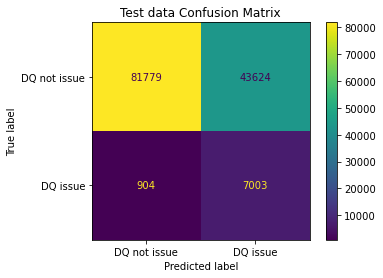

C:\Users\sudeep_kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


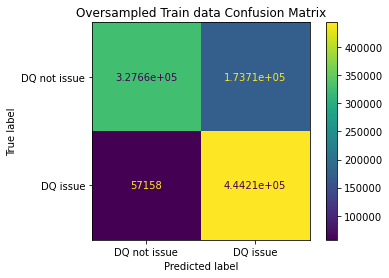

In [125]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

class_names = ['DQ not issue', 'DQ issue']

plot_confusion_matrix(k, X_test, y_test,  values_format = '.5g', display_labels=class_names) 
plt.title("Test data Confusion Matrix")
plt.show()

plot_confusion_matrix(k, X_train_res, y_train_res,  values_format = '.5g', display_labels=class_names)
plt.title("Oversampled Train data Confusion Matrix")
plt.show()

ROC-AUC: 0.7767100010328053


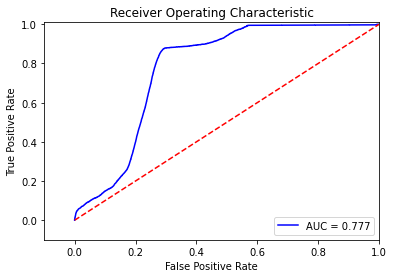

In [126]:
y_k =  k.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_k)

roc_auc = auc(fpr,tpr)

print("ROC-AUC:", roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
auc(roc(rand_preds, labels))


In [127]:
y_train.value_counts()

DQ Issue
0           501372
1            31868
dtype: int64

In [128]:
#Decision tree with out SMOTE
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [129]:
# decision tree prediction
y_pred = classifier.predict(X_test)#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9678793788913059


In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    125227
           1       0.74      0.72      0.73      8083

    accuracy                           0.97    133310
   macro avg       0.86      0.85      0.86    133310
weighted avg       0.97      0.97      0.97    133310



In [131]:
confusion_matrix(y_test, y_pred)

array([[123174,   2229],
       [  2053,   5854]], dtype=int64)

In [136]:
#randam forest with out smote
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_normal = clf.fit(X_train,y_train)

y_pred=clf_normal.predict(X_test)

<ipython-input-136-c16bff4b9048>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_normal = clf.fit(X_train,y_train)


In [133]:
#Random Forest
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9670992423674143


In [134]:
#Logistic Regression
print(metrics.accuracy_score(y_test,y_test_pre))

0.6659815467706849


0.8612876038581171
ROC-AUC: 0.8612876038581171


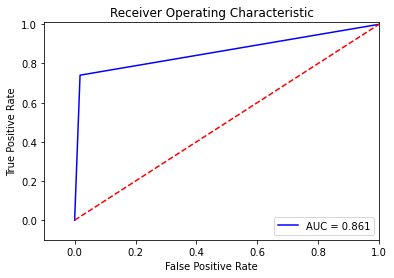

In [135]:
#Decision tree with out SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
y_decision =  classifier.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_decision[:,1])

print(roc_auc_score(y_test, y_decision[:,1]))

roc_auc = auc(fpr,tpr)

print("ROC-AUC:", roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9860615214413911
ROC-AUC: 0.9860615214413911


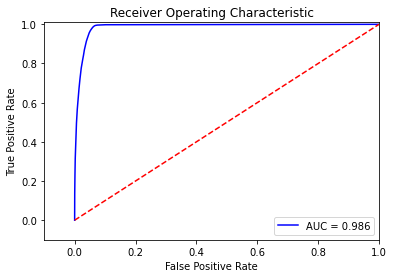

In [137]:
#random Forest with out smote

from sklearn.metrics import roc_curve, roc_auc_score
y_random =  clf_normal.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_random[:,1])

roc_auc = auc(fpr,tpr)
print(roc_auc_score(y_test, y_random[:,1]))

print("ROC-AUC:", roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [138]:
#Decision Tree with SMOTE
classifier_smote = classifier.fit(X_train_res, y_train_res)

In [139]:
# decision tree prediction
y_pred = classifier_smote.predict(X_test)#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9565523966694172


In [141]:
#Decision Tree Classifier report
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    121733
           1       0.87      0.59      0.70     11577

    accuracy                           0.96    133310
   macro avg       0.91      0.79      0.84    133310
weighted avg       0.95      0.96      0.95    133310



In [140]:
#random
clf=RandomForestClassifier(n_estimators=100)

clf_smote = clf.fit(X_train_res, y_train_res)

y_pred_random=clf_smote.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random))

Accuracy: 0.9526742179881479


In [142]:
#RandomForest Classifier report
from sklearn.metrics import classification_report
print(classification_report(y_pred_random,y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    120526
           1       0.91      0.56      0.70     12784

    accuracy                           0.95    133310
   macro avg       0.93      0.78      0.83    133310
weighted avg       0.95      0.95      0.95    133310



0.9141033605115059
ROC-AUC: 0.9141033605115059


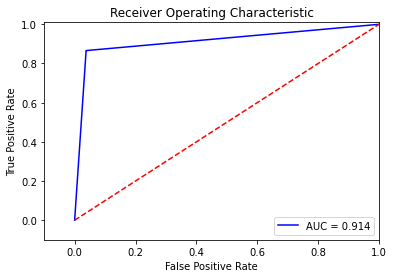

In [143]:
#Decision tree SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
y_decision =  classifier_smote.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_decision[:,1])

print(roc_auc_score(y_test, y_decision[:,1]))

roc_auc = auc(fpr,tpr)

print("ROC-AUC:", roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9840007773960401
ROC-AUC: 0.9840007773960401


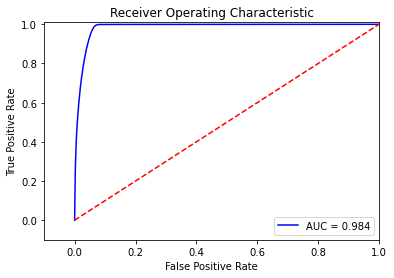

In [144]:
#random Forest

from sklearn.metrics import roc_curve, roc_auc_score
y_random =  clf_smote.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_random[:,1])

roc_auc = auc(fpr,tpr)
print(roc_auc_score(y_test, y_random[:,1]))

print("ROC-AUC:", roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#SVM with out smote
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',C=1)
svclassifier.fit(X_train, y_train)

C:\Users\sudeep_kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from sklearn.svm import LinearSVC
svclassifier = LinearSVC(random_state=0, tol=1e-5)
svclassifier.fit(X_train, y_train) 

C:\Users\sudeep_kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sudeep_kumar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [32]:
y_pred_linear = svclassifier.predict(X_test)


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

[[125344     59]
 [  7838     69]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    125403
           1       0.54      0.01      0.02      7907

    accuracy                           0.94    133310
   macro avg       0.74      0.50      0.49    133310
weighted avg       0.92      0.94      0.91    133310



In [34]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred_linear))

Accuracy Score: 0.9407621333733404


ROC-AUC: 0.504127980879968


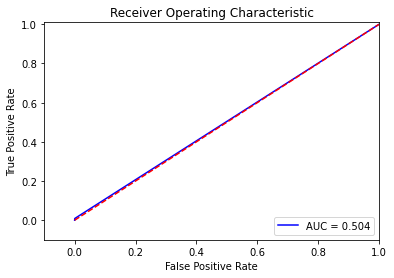

In [41]:
#random Forest
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, auc, roc_curve
from matplotlib import pyplot as plt
y_random =  svclassifier.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_linear)


#fpr, tpr, thresholds = roc_curve(y_test, y_random[:,1])

roc_auc = auc(fpr,tpr)
#print(roc_auc_score(y_test, y_random[:,1]))

print("ROC-AUC:", roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#SVM with out smote
from sklearn.svm import SVC
svclassifier_rbf = SVC(kernel='rbf')
svclassifier_rbf.fit(X_train, y_train)

C:\Users\sudeep_kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.ensemble import IsolationForest

random_state = np.random.RandomState(42)

model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

